In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log
from matplotlib import cm

$$ f(x,y) =  \frac{1}{3^{-x^2 - y^2} + 1} $$

$$f(x,y) = \frac {1} {r + 1}$$

### where r is $ {3}^{-x^2 - y^2}$

In [2]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1/(r+1)

In [3]:
x_1 = np.linspace(-2 , 2, 200)
y_1 = np.linspace(start = -2 , stop = 2 , num= 200)

In [4]:
x_1.shape

(200,)

In [5]:
y_1.shape

(200,)

In [6]:
x_1,y_1 = np.meshgrid(x_1,y_1) 

In [7]:
x_1.shape

(200, 200)

In [8]:
y_1.shape

(200, 200)

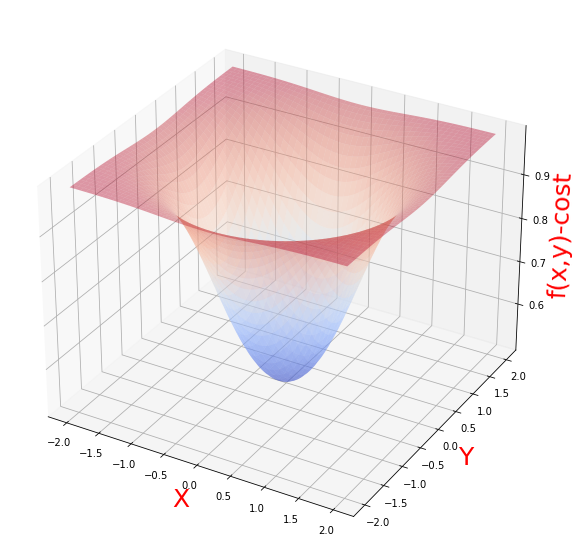

In [9]:
fig = plt.figure(figsize =(10,10)).add_subplot(projection = "3d")
fig.set_xlabel('X' , fontsize = 25 ,c = 'red')
fig.set_ylabel('Y',fontsize = 25 ,c = 'red')
fig.set_zlabel('f(x,y)-cost' ,fontsize = 25 , c = 'red')
fig.plot_surface(x_1,y_1,f(x_1,y_1) , alpha = 0.4 ,cmap = cm.coolwarm)
plt.show()

# Partial derivatives of the fuction
# Partial derivatives

$$ \frac{\partial f}{\partial x} = \frac{2x ln(3).{3}^{-x^2 - y^2}}{{3}^{-x^2 - y^2}} $$

$$ \frac{\partial f}{\partial y} = \frac{2y ln(3).{3}^{-x^2 - y^2}}{{3}^{-x^2 - y^2}} $$

In [10]:
def fpx(x,y):                                                 # partial fuction = fp
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r+1)**2

In [11]:
def fpy(x,y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r+1)**2

In [12]:
params = np.array([1.8 , 1.0])                          # params = parameters .... we can choose any name

In [13]:
params[0]            # x value

1.8

In [14]:
params[1]           # y value

1.0

In [15]:
params = np.array([1.8,1.0])
max_iter = 1000                                # maximum iteration
multiplier = 0.1

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y =fpy(params[0], params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients

In [16]:
params

array([1.86518076e-23, 1.03621153e-23])

In [17]:
gradients

array([1.08410585e-23, 6.02281029e-24])

In [18]:
f(params[0], params[1])

0.5

# Plotting

In [19]:
params = np.array([1.8 , 1.0])
max_iter = 1000
multiplier = 0.1
values_array = params.reshape(1,2)

for n in range(max_iter):
        
    gradient_x = fpx(params[0], params[1])    
    gradient_y = fpy(params[0], params[1])    
    gradients = np.array([gradient_x, gradient_y])   
    params = params - multiplier * gradients    
    values_array = np.append(values_array, params.reshape(1,2), axis = 0 )

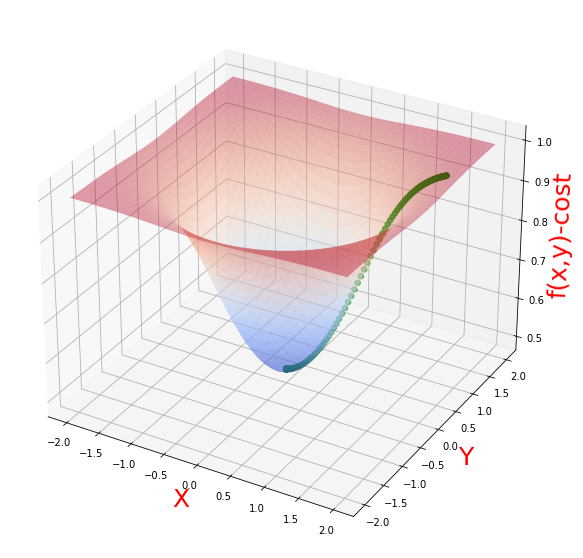

In [20]:
fig = plt.figure(figsize =(10,10)).add_subplot(projection = "3d")
fig.set_xlabel('X' , fontsize = 25 ,c = 'red')
fig.set_ylabel('Y',fontsize = 25 ,c = 'red')
fig.set_zlabel('f(x,y)-cost' ,fontsize = 25 , c = 'red')
fig.plot_surface(x_1,y_1,f(x_1,y_1) , alpha = 0.4 ,cmap = cm.coolwarm)
fig.scatter(values_array[:,0], values_array[:,1], f(values_array[:,0], values_array[:,1]), color = 'green', s = 30)
plt.show() 